# Handling mislabeled training data for classification

### TAMU 689-Stat Computing Course Project (https://longjp.github.io/statcomp/)

## Introduction
In this work, we discuss different ways of handling mislabeled data in classification problems. This work only deals with random 

### What is mislabeled data?

- Data for classification problems in supervised learning, usually consists of a set of feature attributes and a class attribute.

Consider a tranining Data Point:  $(x_1, x_2, x_3, …, x_n, y)$
A data point is considered *mislabeled* if class y is incorrect. Eg. lets say we want to classify a set of images as a dog or cat. If the image is of a cat, we say the class as 1. Following is the training data:

![title](img/cat_classification.png)
*Image source: https://www.deeplearning.ai/*

In the above example, we can see that, there is one data point which is incorrectly labeled, i.e. the white puppy, 2nd from right, is labeled as cat.

### Reasons for Mislabeling data

Some common reasons for mislabeling are as follows:

- **Subjectivity**: It can arise when observations need to be ranked in some way such as disease severity or when the information used to classify object is different from information to which learning algorithm have access. Eg. experts labeling the images, they normally use their visual input rather than each pixel of the image. 
- **Data Entry Error**: It can arise when the training dataset is prepared due to manual error.
- **Inadequate Information**: It can arise when the information used to label each information is insufficient. Eg. in medical diagnosis, it is almost impossible to guarantee that a diagnosis is 100% accurate.

### Methods for handling Mislabeling

- **Noise Elimination**: In this approach, mislabeled data points are removed and then learning classifier is applied on the remaining dataset.
- **Noise Tolerance**: In this approach, mislabeled data points are not removed and the learning classifier is applied on the original training data. 

Our ideas are based on Noise elimination approach. We discuss 2 ideas in our project to identify mislabeled instances. First one is a general approach and second one uses a specific algorithm called *RankPruning*.

### General filtering approach 

This idea is taken from the paper ["Identifying Mislabeled Training Data" C. E Brodley and M. A. Friedl, 1999 ](https://arxiv.org/abs/1106.0219). It describes the general procedure for identifying the mislabeled instances in a training set. It consists of following steps:
1. Identify candidate instance by using m learning algorithms(or filters) to tag them as correctly or incorrectly labeled. This is done in following way:
    -  Divide training data into n folds
    -  Train a filtering model on (n-1) folds using m learning algorithms, and add a *mislabeled* class attribute to the examples in the nth fold using the same m classifiers. 
    -  Repeat this for n folds
    -  In end, all instances have been tagged as mislabeled or not. 
2. Now, on this mislabeled training dataset, apply the filtering approach to remove all the mislabeled instances. 
3. Apply the final learning algorithm on the filtered training instances. This resulting classifier is end product of this approach.

Figure below depicts this idea:


![title](img/filtering.png)

### Types of Filtering approaches

There are 3 types of filtering approaches we tried and compared them:
- Single Algorithm Filter
    -  Filtering is done by one algorithm
    -  Instance is marked as mislabeled if this algorithm tagged it as mislabeled
- Majority Vote Filter
    -  Filtering is done by multiple algorithms
    -  Instance is marked as mislabeled if more than half of the algorithms tagged it as mislabeled
- Consensus Filter
    -  Filtering is done by multiple algorithms
    -  Instance is marked as mislabeled if all of the algorithms tagged it as mislabeled

### Identification Errors

In identifying mislabeled instances, there are 2 types of errors that can be made:
1. E1 - This occurs when a correct instances is incorrectly tagged as mislabeled and subsequently discarded. This is equivalent to throwing out the good data.
2. E2 - This occurs when a mislabeled instance is tagged as correctly labeled. This is equivalent of keeping the bad data after filtering.

Below is the figure showing E1 and E2 in the training instances space in form of Venn Diagram

<img src="img/identification_errors.png" alt="Drawing" style="width: 300px;"/>

Now, we analyze the probability of each of these errors in majority and consensus filter.

<h4>1. Majority Filter</h4>

In case of Majority filter, E1 occurs when more than half of the m-base level classifiers tagged the instance as mislabeled. Let $P(E1_i)$ be the probability that classifier i makes an error E1 and assume that all the m-base level classifiers have equal probability to make an error E1. Then, the probability of the majority vote filter to make  an error E1 is given by:

<h4><center>$P(E1) = \sum_{j>m/2}^{j=m} P(E1_i)^j (1 - P(E1_i))^{m-j}{m \choose j}$</center></h4>

The error E2 occurs when more than half of the m-base level classifiers tagged the incorrect instance as correctly labeled and hence the instance is not removed. Let $P(E2_i)$ be the probability that classifier i makes an error E2 and assume errors are independent. Then, the probability that the majority vote filter would make an error E2 is given by:

<h4><center>$P(E2) = \sum_{j>m/2}^{j=m} P(E2_i)^j (1 - P(E2_i))^{m-j}{m \choose j}$</center></h4>

<h4>2. Consensus Filter</h4>

For a consensus filter, an E1 error occurs when all of the m base level classifiers fail to classify instance correctly. Let $P(E1_i)$ be the probability that classifier i makes error E1. Then, the probability of the consensus filter to make  an error E1 is given by:

<h4><center>$P(E1) = \prod_{i=1}^{m} P(E1_i)$</center></h4>

The error E2 in case of consensus filter occurs when a incorrect instance is tagged as correct by atleast one of m-base level classifiers. Let $P(E2_i)$ be the probability that classifier i makes error E2. Then, the probability of the consensus filter to make  an error E2 is given by:

<h4><center>$P(E2) = 1 - \prod_{i=1}^{m} (1 - P(E2_i))$</center></h4>

#### E1 and E2 General Formula:

A general formula to calculate the probability of throwing out good data(E1) is :

<h3><center>$P(E1) = \frac{Discarded - Intersect}{Total-Corrupted} = \frac{D - M \cap D}{Total - M}$</center></h3>

Similarly, general formula to calculate the probability of keeping bad data(E2) is :

<h3><center>$P(E2) = \frac{Corrupted - Intersect}{Corrupted} = \frac{M - M \cap D}{M}$</center></h3>

These are the formulas we have used in our code to calculate P(E1) and P(E2). These formulas are evident from the Venn diagram shown above.

### Code Results & Evaluation

We have written the code in Python to evaluate the different types of filtering approach discussed above. First we implemented the approach and then we apply a wrapper on top of that to vary the inputs to that implementation which changes Noise level, classifiers and filtering types. We shows the accuracy of different filtering approaches by varying noise levels in the training data. Also, we show the E1 and E2 errors by varying noise levels and filtering approaches. 

Evaluation is done on MNIST dataset. The training is done on 10000 images and test data comprises of 1000 images. We add noise to training data and the test dataset is kept clean. We used different classifier algorithms for different filtering approaches. We always used Logistic Regression as the final classifier model to keep the results consistent among different filtering approaches. Below is the list of filtering algorithms used in each filtering approach:

- **Single Algorithm Filter(SF)** : Logistic Regression
- **Majority Filter(MF)** : Logistic Regression, Random Forest Classifier, MLP Classifier
- **Consensus Filter(CF)** : Logistic Regression, Random Forest Classifier, MLP Classifier

Noise level used = [0%, 5%, 10%, 15%, 20%, 25%, 30%, 35%, 40%]

Below is the result from the code showing accuracy and errors E1, E2 for different noise levels and different approaches:

Running for noise level =  0.0  and filtering =  False  and filtering type =  None
Running for noise level =  0.0  and filtering =  True  and filtering type =  SF
Running for noise level =  0.0  and filtering =  True  and filtering type =  MF
Running for noise level =  0.0  and filtering =  True  and filtering type =  CF
Running for noise level =  0.05  and filtering =  False  and filtering type =  None
Running for noise level =  0.05  and filtering =  True  and filtering type =  SF
Running for noise level =  0.05  and filtering =  True  and filtering type =  MF
Running for noise level =  0.05  and filtering =  True  and filtering type =  CF
Running for noise level =  0.1  and filtering =  False  and filtering type =  None
Running for noise level =  0.1  and filtering =  True  and filtering type =  SF
Running for noise level =  0.1  and filtering =  True  and filtering type =  MF
Running for noise level =  0.1  and filtering =  True  and filtering type =  CF
Running for noise level =  

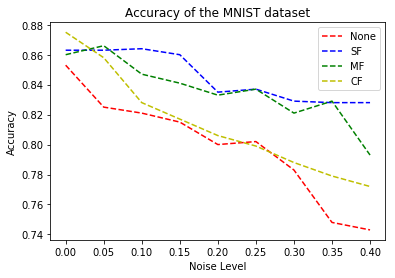

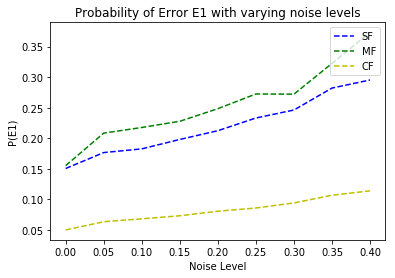

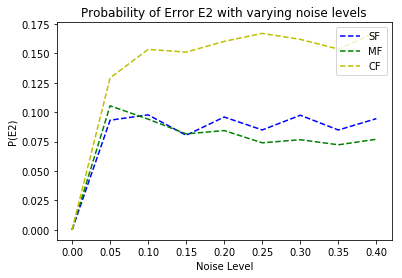

In [1]:
%run -i 'script.py'

We showed 3 figures in our evaluation:
1. **Accuracy comparison of different filters**
 - It is important to note that, all the filter approaches works better than the case when we don't use any filter.
 - Accuracy of majority filter is much better than consensus filter and one of the main reason for that is consensus filter is conservative, so it does not remove bad data very easily.
2. **Probability of error E1 comparison of different filters**
 - Probability of error E1 for consensus filter is lowest among 3 filters. And one of the main reason for that is consensus filter does not remove data points easily, hence it does not remove good data easily. And so, E1 is very less for consensus filter.
3. **Probability of error E2 comparison of different filters**
 - Probability of error E2 for consensus filter is most among 3 filters. This is because of the same reason as above. But this time, its conservative nature works against it in the sense that, it does not remove bad data also very easily and hence it is keeping bad data more as compared to other 2 filters. 


### Using the tool

The *runner* method defined in `main.py` has the following signature:
`runner(classifiers_for_filtering, noise_level, filtering, filtering_type=None)`
- It takes a array of classifiers for filtering, noise level for corrupting the training set and filtering type to use.
- You may use this function for trying different models. See [script.py](https://github.com/shubham7jain/STAT689-Project/blob/master/script.py) for an example.

### Rank Pruning - Learning with confident examples

This technique was [published](http://auai.org/uai2017/proceedings/papers/35.pdf) in UAI 2017. The main idea here is to formulate the problem as a $\tilde{P}\tilde{N}$ learning problem and solve it using Rank Pruning (RP).

#### Framing a $\tilde{P}\tilde{N}$ learning problem for the training data

Given *n* observed training examples $x \in R^D$ with associated corrupted labels $s \in \{0, 1\}$ and unobserved true labels $y \in \{0, 1\}$, we seek a binary classifier $f$ that estimates the mapping $x \rightarrow y$. But if we fit the observed data, we will get a classifier $g(x) = P(\hat{s}=1|x) $.

We define observed noisy positive and negative sets as $\tilde{P} = \{x |s = 1\}$ and $\tilde{N} = \{x |s = 0\}$ and unobserved true postive and negative sets $P = \{x |y = 1\}$ and $N = \{x |y = 0\}$.

We assume that labels in $P$ are flipped independently with probability $\rho_1$ and each label in $N$ is flipped independently with probability $\rho_0$.

The goals of rank pruning are:

1) To uncover the classifications of $f$ from $g$.

2) Estimate the noise rates $\rho_0$ and $\rho_1$.

### RankPruning algorithm

The mathematical details of the algorithm can be found in the [paper](http://auai.org/uai2017/proceedings/papers/35.pdf). Here, we will explain the general idea of the algorithm:

- RankPruning takes as input, the training examples $X$ with noisy labels $s$ and a probabilistic classifier $clf$.
- Using this classifier $clf$ and data, it finds a subset of $(X, s)$ that is likely to be correctly labeled. i.e. a subset of $(X, y)$.
- To do this, we first find two thresholds $LB_{y=1}$ and $UB_{y=0}$, to confidently guess the correctly and incorrectly labeled examples in each of $\tilde{P}$ and $\tilde{N}$, forming four sets.
- We then use the different set sizes to estimate the noise rates $\rho_0$ and $\rho_1$.

$$ \tilde{\rho_{1}}^{conf} = \frac{|\tilde{N}_{y=1}|}{|\tilde{N}_{y=1}| + |\tilde{P}_{y=1}|}$$
$$ \tilde{\rho_{0}}^{conf} = \frac{|\tilde{P}_{y=0}|}{|\tilde{P}_{y=0}| + |\tilde{N}_{y=0}|}$$
where

$$ \tilde{P}_{y=1} = \{x \in \tilde{P} \mid g(x) \ge LB_{y=1}\} $$
$$ \tilde{N}_{y=1} = \{x \in \tilde{N} \mid g(x) \ge LB_{y=1}\} $$
$$ \tilde{P}_{y=0} = \{x \in \tilde{P} \mid g(x) \le UB_{y=0}\} $$
$$ \tilde{N}_{y=0} = \{x \in \tilde{N} \mid g(x) \le UB_{y=0}\} $$
- Using these noise rates, we estimate the number of examples to be removed from $\tilde{P}$ and $\tilde{N}$ to get *confident* examples. 
- We prune the set $\tilde{P}$ by removing values that have lowest predited probablity $g(x)$ and $\tilde{N}$ by removing values that have highest predicted probability $g(x)$.
- Finally, the classifier is fit to the pruned set, which is intended to be the correctly labeled data.

### Assumptions and main idea

### RP Evaluation

We tested the rank pruning algorithm by using a logistic regression baseline model, and a noisy dataset created using a multivariate normal distribution. (The parameters used were presented by the authors in their tutorial).

The analysis code can be found in [rp_comparison.py](https://github.com/shubham7jain/STAT689-Project/blob/master/rp_comparison.py). 

The training data was generated using *numpy's* multivariate_normal as follows (more details can be found in [rp_comparison.py](https://github.com/shubham7jain/STAT689-Project/blob/master/rp_comparison.py): 

    neg = pd.DataFrame(multivariate_normal(mean=[2,2], cov=[[10,-1.5],[-1.5,5]], size=1000), columns = ['x1', 'x2'])
    neg['label'] = [0 for i in range(len(neg))]
    pos = pd.DataFrame(multivariate_normal(mean=[5,5], cov=[[1.5,0.3],[1.3,4]], size=500), columns = ['x1', 'x2'])
    pos['label'] = [1 for i in range(len(pos))]    

![title](img/rp_training_data.png)

Accuracy values were calculated for the Baseline, Rankpruning with given noise rates and estimated noise rates.

| Noise Rates <br /> ($\rho_0$, $\rho_1$)| Logistic Regression | Rank Pruning  | Rank Pruning <br /> (Noise rates given)
|---|---|---|---|---|
| 0, 0  | 0.845  | 0.844  | 0.845  |
| 0.2, 0.6  | 0.666 | 0.827  | 0.832  |
| 0.3, 0.5  | 0.670  | 0.807  | 0.816  |
| 0.6, 0.2  | 0.338  | 0.778| 0.834 | 

#### Observations
- We can see that RankPruning does significantly better compared to the baseline model with increased noise rates. 
- When noise rates are known, RP does better than the case where noise rates are unknown.

If you'd like to try other parameters/models, the analysis code is available [here](https://github.com/shubham7jain/STAT689-Project/blob/master/rp_comparison.py). You can modify the parameters `rho0_neg2pos`, `rho1_pos2neg`, `clf`.



### Using the RankPruning library

The RankPruning library can be called as shown in [rp_comparison.py](https://github.com/shubham7jain/STAT689-Project/blob/master/rp_comparison.py) and be used with any model. We have written a simple wrapper on top of the authors implementation for ease of use.

## Future Work
We'd like to extend the anlysis to include other models (such as discriminant analysis) and datasets (such as MNIST) for comparison.